### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [3]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
sample = pd.read_csv('../datasets/sample_sub_reg.csv')

### Training data cleaning

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [6]:
train['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [7]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [8]:
train = train.drop(columns =['Lot Frontage', 'Misc Feature', 'Fence', 'Pool QC',
                             'Fireplace Qu','Alley'])
null = train.isnull().sum()
print(null)

Id             0
PID            0
MS SubClass    0
MS Zoning      0
Lot Area       0
              ..
Misc Val       0
Mo Sold        0
Yr Sold        0
Sale Type      0
SalePrice      0
Length: 75, dtype: int64


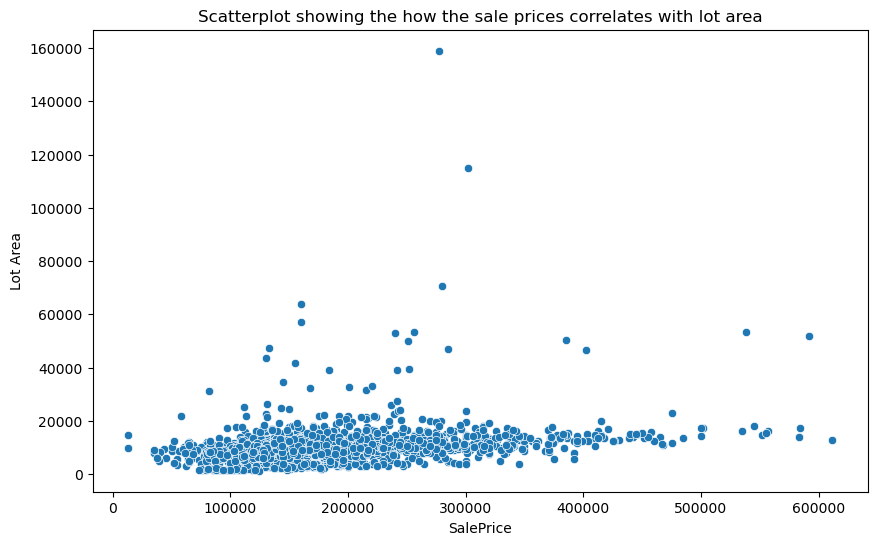

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SalePrice', y='Lot Area', data=train)
plt.title('Scatterplot showing the how the sale prices correlates with lot area')
plt.savefig('../Graphs/LotArea_SalePrice', dpi=600)

#### correlatation with Sale Price

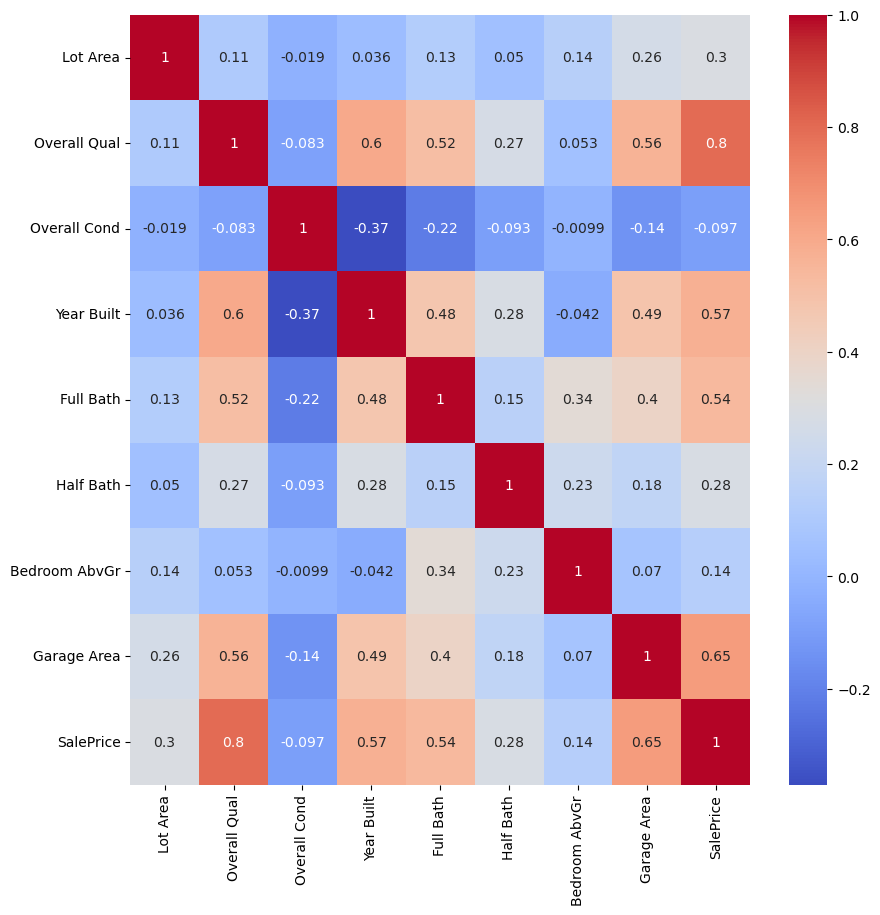

In [11]:
selected_train = train[['Lot Area','Overall Qual','Overall Cond','Year Built','Full Bath',
                      'Half Bath', 'Bedroom AbvGr', 'Garage Area', 'SalePrice']]
plt.figure(figsize=(10,10))
sns.heatmap(selected_train.corr(), cmap='coolwarm', annot=True);
plt.savefig('../Graphs/first selected heatmap', dpi=900)

#### correlation with Sale Price

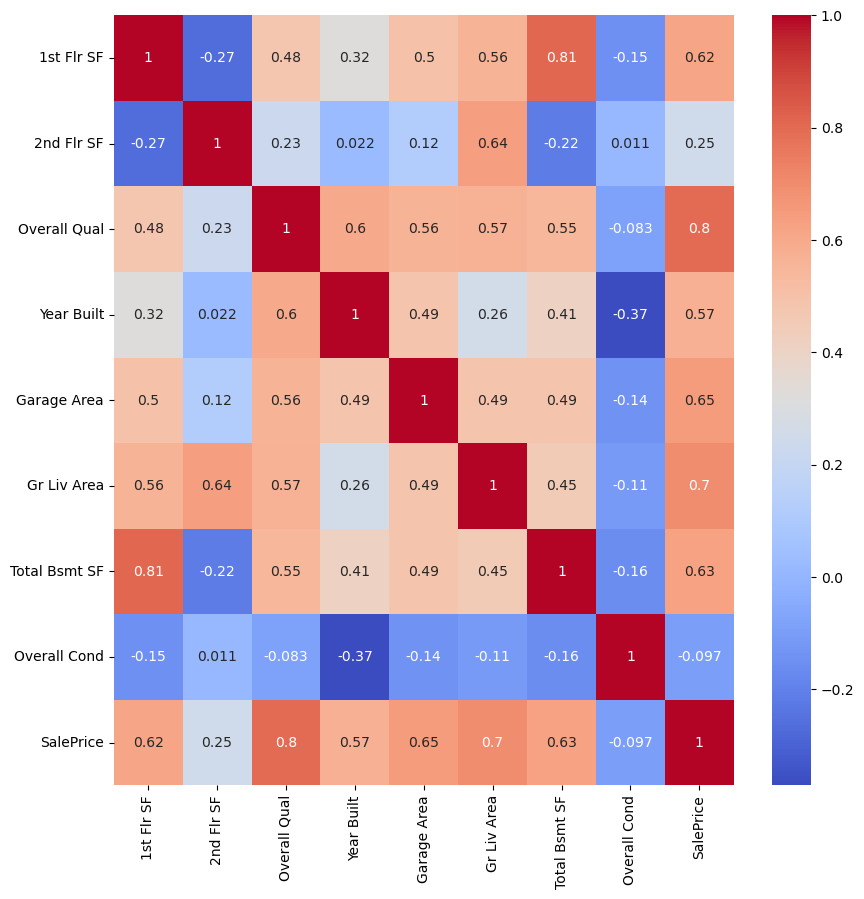

In [12]:
selec2_train = train[['1st Flr SF', '2nd Flr SF', 'Overall Qual', 'Year Built', 'Garage Area',
                     'Gr Liv Area', 'Total Bsmt SF', 'Overall Cond', 'SalePrice']]
plt.figure(figsize=(10,10))
sns.heatmap(selec2_train.corr(), cmap='coolwarm', annot=True);
plt.savefig('../Graphs/2nd_selecteddata', dpi=900)

In [13]:
train = pd.get_dummies(train, columns=['House Style'], drop_first=True)

In [14]:
train

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Yr Sold,Sale Type,SalePrice,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,2010,WD,130500,0,0,0,0,1,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,2009,WD,220000,0,0,0,0,1,0,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,109000,0,1,0,0,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,174000,0,0,0,0,1,0,0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,2010,WD,138500,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,11449,Pave,IR1,HLS,AllPub,Inside,...,2008,WD,298751,0,1,0,0,0,0,0
2047,785,905377130,30,RL,12342,Pave,IR1,Lvl,AllPub,Inside,...,2009,WD,82500,0,1,0,0,0,0,0
2048,916,909253010,50,RL,7558,Pave,Reg,Bnk,AllPub,Inside,...,2009,WD,177000,0,0,0,0,0,0,0
2049,639,535179160,20,RL,10400,Pave,Reg,Lvl,AllPub,Corner,...,2009,WD,144000,0,1,0,0,0,0,0


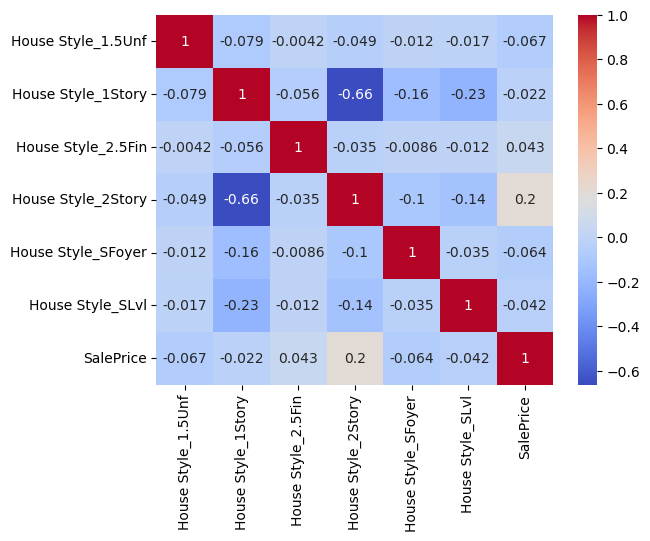

In [15]:
type_train = train[['House Style_1.5Unf','House Style_1Story', 'House Style_2.5Fin', 'House Style_2Story',
                     'House Style_SFoyer', 'House Style_SLvl', 'SalePrice']]
sns.heatmap(type_train.corr(), cmap = 'coolwarm', annot=True);

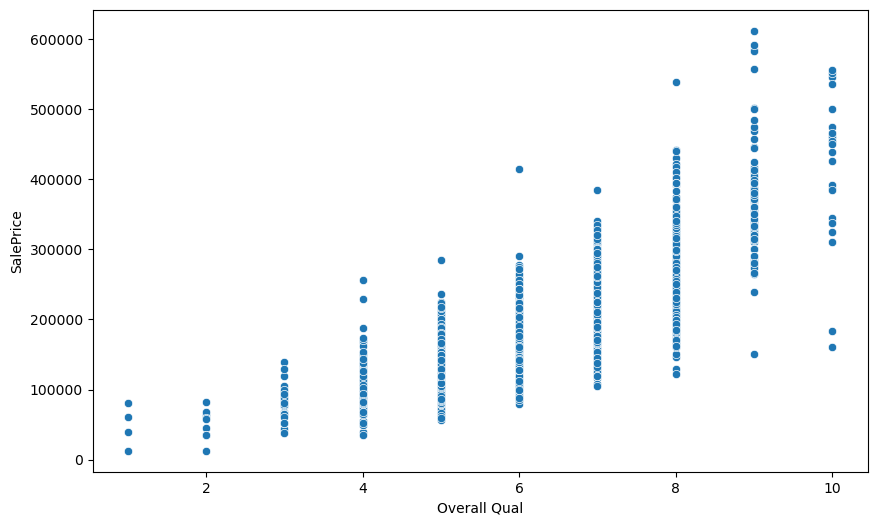

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Overall Qual', y='SalePrice', data=train)

plt.savefig('../Graphs/Overall Quality against Sale Price', dpi=600)

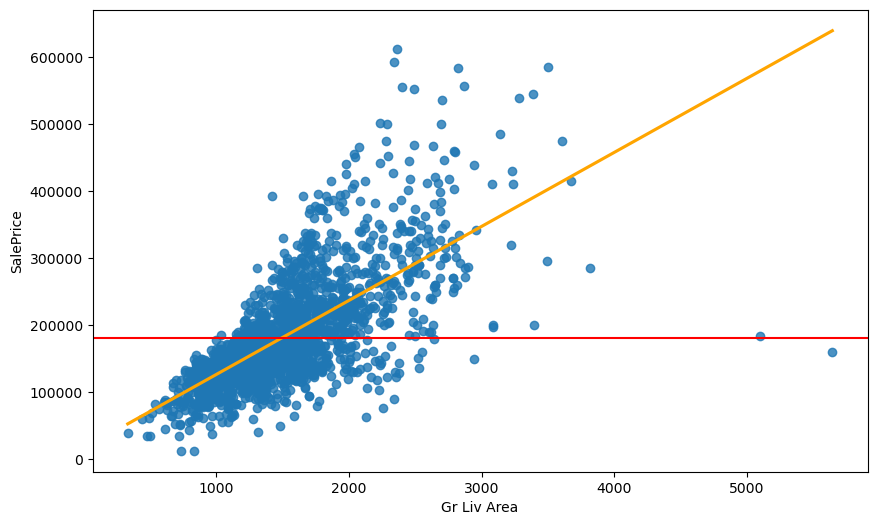

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x='Gr Liv Area', y='SalePrice', data=train, ci=None, line_kws={'color':'orange'})
null_predpric = train['SalePrice'].mean()
plt.axhline(null_predpric, color='red')
plt.savefig('../Graphs/Grlivearea_saleprice', dpi=900)

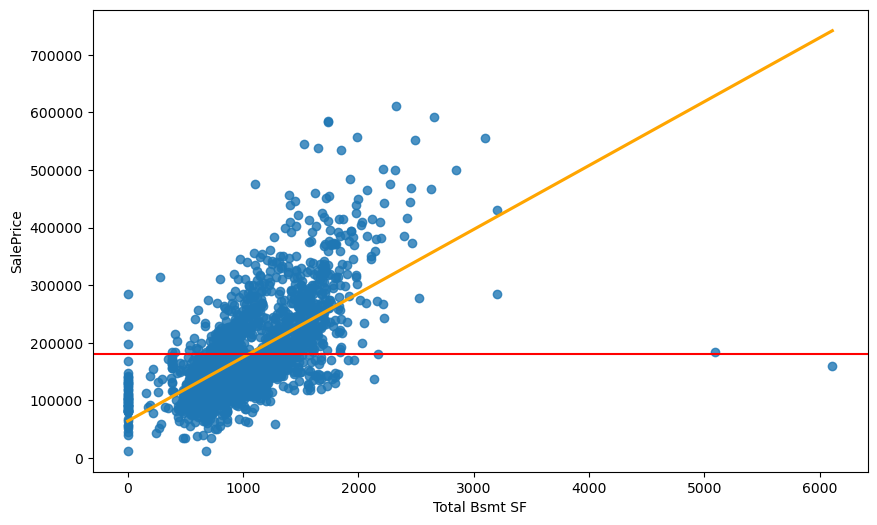

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x='Total Bsmt SF', y='SalePrice', data=train, ci=None, line_kws={'color':'orange'})
null_predpric = train['SalePrice'].mean()
plt.axhline(null_predpric, color='red')
plt.savefig('../Graphs/totalbsmt_saleprice', dpi=900)

### Final Selected columns for training data

In [19]:
finaltrain = train[['Id','Overall Qual', 'Year Built', 'Full Bath', 'Half Bath', 'Garage Area',
                   'Total Bsmt SF', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF', 'SalePrice']]

missing= finaltrain.isnull().any(axis=1)
missing_values = train[missing]
print(missing_values)

        Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
1327  1342  903230120           20        RM      5940   Pave       IR1   
1712  2237  910201180           70        RM      9060   Pave       Reg   

     Land Contour Utilities Lot Config  ... Yr Sold Sale Type SalePrice  \
1327          Lvl    AllPub        FR3  ...    2008     ConLD     79000   
1712          Lvl    AllPub     Inside  ...    2007       WD     150909   

     House Style_1.5Unf House Style_1Story  House Style_2.5Fin  \
1327                  0                  1                   0   
1712                  0                  0                   0   

      House Style_2.5Unf  House Style_2Story  House Style_SFoyer  \
1327                   0                   0                   0   
1712                   0                   1                   0   

     House Style_SLvl  
1327                0  
1712                0  

[2 rows x 81 columns]


In [20]:
finaltrain['Garage Area'].fillna(0, inplace=True)
finaltrain['Total Bsmt SF'].fillna(0, inplace=True)

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_76151/1388683097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltrain['Garage Area'].fillna(0, inplace=True)
/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_76151/1388683097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltrain['Total Bsmt SF'].fillna(0, inplace=True)


In [21]:
finaltrain.to_csv('../datasets/Selected_train_data.csv', index=False)

### Exploring Neighbourhood

In [22]:
train = pd.get_dummies(train, columns=['Neighborhood'], drop_first=True)

In [23]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

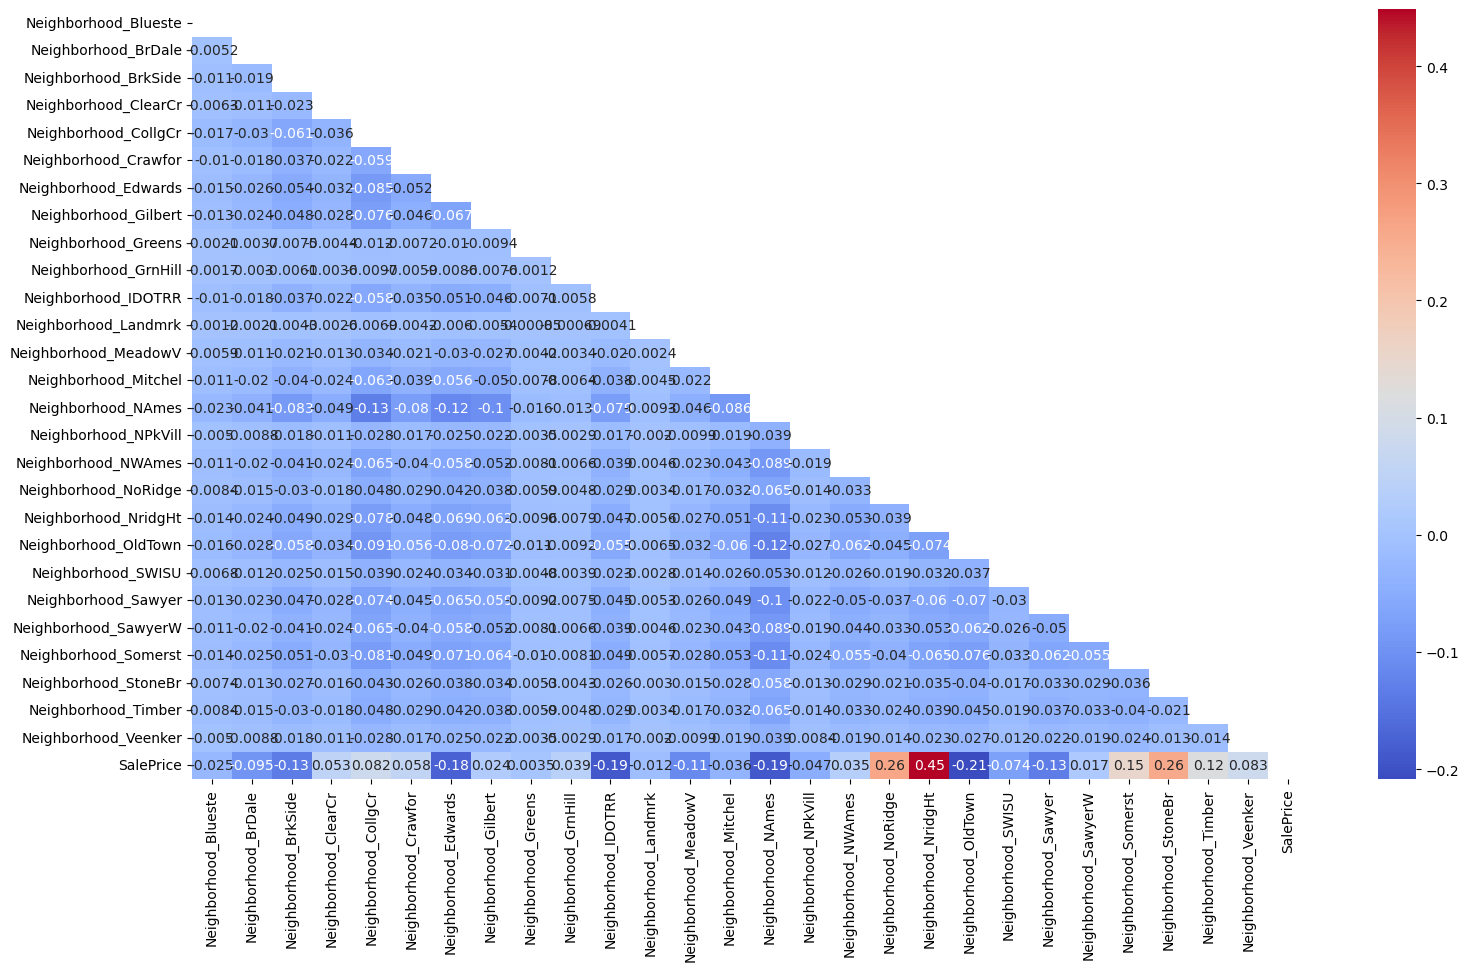

In [24]:
trainNeigh = train[['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                   'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
                   'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
                   'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
                   'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
                   'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                   'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
                   'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
                   'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
                   'SalePrice']]
plt.figure(figsize=(18,10))
mask = np.zeros_like(trainNeigh.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(trainNeigh.corr(), mask=mask, cmap='coolwarm', annot=True)

### Testing Data Cleaning

In [25]:
def test_cleaning(df):
    df = df.drop(columns=['Lot Frontage', 'Misc Feature', 'Fence', 'Pool QC', 'Fireplace Qu',
                        'Alley'])
    df['FbathxHbath'] = df['Full Bath'] * df['Half Bath']
    finaltest = df[['Id','Overall Qual', 'Year Built', 'Full Bath','Half Bath','Garage Area',
                     'Total Bsmt SF', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF','FbathxHbath']]
   
    return finaltest

In [26]:
finaltest1 = test_cleaning(test)

In [27]:
finaltest1.to_csv('../datasets/Selected_test_data1.csv', index=False)